In [10]:
import pandas as pd
import numpy as np
import psycopg2
import pyodbc
import mysql.connector
import json
import matplotlib.pyplot as plt
import seaborn as sns
from decimal import Decimal

import requests
import datetime
from tqdm import tqdm

import random
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [2]:
pyodbc.drivers()

['MySQL']

In [3]:
# Redshift 연결 정보
host='dev-data-etl-rs.ct0xxcn9xq5g.ap-northeast-2.redshift.amazonaws.com'
dbname='data_analysis_db'
user='stella'
password='iWntan282E5jJQc'
port='5439'

In [4]:
# Redshift에 연결
conn = psycopg2.connect(
    host=host,
    dbname=dbname,
    user=user,
    password=password,
    port=port
)

In [5]:
# 커서 생성
cursor = conn.cursor()
# SQL 쿼리 실행 (예시: frigga_sample 테이블에서 모든 데이터를 조회)
cursor.execute("""                          
                    SELECT 
                        *
                    FROM 
                        "data_analysis_db"."da_schema"."t_frigga_broken_target"
                    WHERE 1=1
                    ORDER BY device_serial ASC
                ;
               """)

# 결과 가져오기
rows = cursor.fetchall()

# 컬럼명 가져오기
columns = [desc[0] for desc in cursor.description]

# DataFrame으로 변환
df_broken = pd.DataFrame(rows, columns=columns)

# 커서와 연결 종료
cursor.close()
conn.close()

In [6]:
df_broken.head(2)

,device_serial,start_date,end_date,duration_time,duration_day,min_temp,max_temp,mean_temp,std_temp,min_humi,max_humi,mean_humi,std_humi,min_acc,max_acc,mean_acc,std_acc,q1_temp,q3_temp,temp_start,temp_end,q1_humi,q3_humi,humi_start,humi_end,q1_acc,q3_acc,acc_start,acc_end,ta_min,ta_max,ta_mean,ta_std,ta_q1,ta_q3,ws1_min,ws1_max,ws1_mean,ws1_std,ws1_q1,ws1_q3,ws10_min,ws10_max,ws10_mean,ws10_std,ws10_q1,ws10_q3,hm_min,hm_max,hm_mean,hm_std,hm_q1,hm_q3,alert_temp_sum,alert_humi_sum,alert_acc_sum,broken_yn
0,VC6M6002,2024-12-02 14:47:18,2024-12-11 23:37:18,224.83,9.00,1.80,21.00,9.36,11.57,48.00,80.00,67.81,5.29,1.00,1.40,1.02,0.05,6.90,11.70,-0.30,18.90,64.00,72.00,52.00,84.00,1.00,1.00,1.00,1.00,0.70,16.10,6.11,3.25,3.80,8.00,0.00,9.10,3.32,1.51,2.30,4.20,0.00,8.10,3.24,1.34,2.30,3.90,15.50,83.40,45.84,12.33,39.80,53.60,12,10,200,0
1,VC6M6003,2024-12-14 09:40:13,2025-01-23 23:50:13,974.17,40.00,-0.10,19.80,6.83,14.00,37.00,66.00,56.53,7.61,1.00,1.52,1.02,0.06,3.90,9.00,-3.75,16.65,49.00,62.00,29.50,81.50,1.00,1.01,0.98,1.02,-5.40,12.10,5.38,3.79,3.90,8.08,0.00,7.30,2.94,1.32,2.10,3.70,0.10,7.50,2.99,1.26,2.10,3.70,-99.20,100.00,42.83,19.78,36.10,48.05,24,0,148,1


In [9]:
df_broken.info()
print(df_broken.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 57 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   device_serial   156 non-null    object        
 1   start_date      156 non-null    datetime64[ns]
 2   end_date        156 non-null    datetime64[ns]
 3   duration_time   156 non-null    object        
 4   duration_day    156 non-null    object        
 5   min_temp        156 non-null    object        
 6   max_temp        156 non-null    object        
 7   mean_temp       156 non-null    object        
 8   std_temp        156 non-null    object        
 9   min_humi        156 non-null    object        
 10  max_humi        156 non-null    object        
 11  mean_humi       156 non-null    object        
 12  std_humi        156 non-null    object        
 13  min_acc         156 non-null    object        
 14  max_acc         156 non-null    object        
 15  mean_a

In [8]:
# df_broken.to_csv('../data/df_broken_250218.csv', encoding='utf-8', index=False)

In [22]:
df_gen_smp=pd.read_csv('../data/df_generated_sample_250218.csv', encoding='utf-8')

In [23]:
df_broken['example_data']=1

In [24]:
print('---------------------------------------------------------------------------')
print(df_gen_smp.head(3))
print(df_gen_smp.shape)
print('---------------------------------------------------------------------------')
print(df_broken.head(3))
print(df_broken.shape)
print('---------------------------------------------------------------------------')

---------------------------------------------------------------------------
  device_serial           start_date             end_date  duration_time  \
0      VC6M8366  2024-12-08 11:05:56  2024-12-24 22:51:32         395.76   
1      VC6M4603  2024-03-06 16:55:03  2024-04-02 20:16:39         651.36   
2      VC6M3663  2024-03-21 15:55:20  2024-04-06 14:14:32         382.32   

   duration_day  min_temp  max_temp  mean_temp  std_temp  min_humi  max_humi  \
0         16.49     -10.3      18.8        6.0       0.3      23.6      71.4   
1         27.14      -7.7      14.6       -2.0       2.6      14.4      87.6   
2         15.93     -17.6      11.4       -0.6       0.3      24.7      97.5   

   mean_humi  std_humi  min_acc  max_acc  mean_acc  std_acc  q1_temp  q3_temp  \
0       23.2       1.2    79.52    14.12      1.53    12.11     1.53    33.67   
1       39.8       1.6    23.11    32.25     16.21     1.24    51.06   -10.49   
2       31.3       6.9    40.68     5.58     14.67     

In [25]:
df_fin=pd.concat([df_broken, df_gen_smp], ignore_index=True)
print(df_fin.head(2))

  device_serial           start_date             end_date duration_time  \
0      VC6M6002  2024-12-02 14:47:18  2024-12-11 23:37:18        224.83   
1      VC6M6003  2024-12-14 09:40:13  2025-01-23 23:50:13        974.17   

  duration_day min_temp max_temp mean_temp std_temp min_humi max_humi  \
0         9.00     1.80    21.00      9.36    11.57    48.00    80.00   
1        40.00    -0.10    19.80      6.83    14.00    37.00    66.00   

  mean_humi std_humi min_acc max_acc mean_acc std_acc q1_temp q3_temp  \
0     67.81     5.29    1.00    1.40     1.02    0.05    6.90   11.70   
1     56.53     7.61    1.00    1.52     1.02    0.06    3.90    9.00   

  temp_start temp_end q1_humi q3_humi humi_start humi_end q1_acc q3_acc  \
0      -0.30    18.90   64.00   72.00      52.00    84.00   1.00   1.00   
1      -3.75    16.65   49.00   62.00      29.50    81.50   1.00   1.01   

  acc_start acc_end ta_min ta_max ta_mean ta_std ta_q1 ta_q3 ws1_min ws1_max  \
0      1.00    1.00   0.70  

In [33]:
df_fin.head(8)

,device_serial,start_date,end_date,duration_time,duration_day,min_temp,max_temp,mean_temp,std_temp,min_humi,max_humi,mean_humi,std_humi,min_acc,max_acc,mean_acc,std_acc,q1_temp,q3_temp,temp_start,temp_end,q1_humi,q3_humi,humi_start,humi_end,q1_acc,q3_acc,acc_start,acc_end,ta_min,ta_max,ta_mean,ta_std,ta_q1,ta_q3,ws1_min,ws1_max,ws1_mean,ws1_std,ws1_q1,ws1_q3,ws10_min,ws10_max,ws10_mean,ws10_std,ws10_q1,ws10_q3,hm_min,hm_max,hm_mean,hm_std,hm_q1,hm_q3,alert_temp_sum,alert_humi_sum,alert_acc_sum,broken_yn,example_data
0,VC6M6002,2024-12-02 14:47:18,2024-12-11 23:37:18,224.83,9.00,1.80,21.00,9.36,11.57,48.00,80.00,67.81,5.29,1.00,1.40,1.02,0.05,6.90,11.70,-0.30,18.90,64.00,72.00,52.00,84.00,1.00,1.00,1.00,1.00,0.70,16.10,6.11,3.25,3.80,8.00,0.00,9.10,3.32,1.51,2.30,4.20,0.00,8.10,3.24,1.34,2.30,3.90,15.50,83.40,45.84,12.33,39.80,53.60,12,10,200,0,1
1,VC6M6003,2024-12-14 09:40:13,2025-01-23 23:50:13,974.17,40.00,-0.10,19.80,6.83,14.00,37.00,66.00,56.53,7.61,1.00,1.52,1.02,0.06,3.90,9.00,-3.75,16.65,49.00,62.00,29.50,81.50,1.00,1.01,0.98,1.02,-5.40,12.10,5.38,3.79,3.90,8.08,0.00,7.30,2.94,1.32,2.10,3.70,0.10,7.50,2.99,1.26,2.10,3.70,-99.20,100.00,42.83,19.78,36.10,48.05,24,0,148,1,1
2,VC6M6007,2024-12-09 11:00:46,2025-01-23 09:20:46,1078.33,44.00,-10.80,9.60,0.56,10.74,41.00,90.00,57.38,6.91,0.90,1.93,0.99,0.05,-1.30,2.70,-7.30,8.70,53.00,61.00,41.00,73.00,0.92,1.00,0.80,1.12,-15.20,10.00,-1.07,4.60,-3.90,2.40,0.00,7.40,1.89,1.26,1.00,2.60,0.00,7.20,1.89,1.16,1.10,2.50,23.40,93.80,67.88,16.22,55.10,81.00,102,126,8,1,1
3,VC6M6008,2024-11-29 20:12:20,2024-11-30 08:42:20,12.50,0.00,1.10,6.10,3.18,1.45,66.00,75.00,69.08,2.29,1.00,1.21,1.01,0.05,2.40,4.03,-0.04,6.46,67.00,71.00,61.00,77.00,1.00,1.00,1.00,1.00,0.80,4.40,2.92,1.11,2.30,3.70,0.00,3.10,1.49,1.04,0.22,2.40,0.00,4.20,1.42,1.18,0.38,2.00,67.30,97.30,82.79,9.39,75.20,89.00,0,0,4,0,1
4,VC6M600A,2024-12-01 03:08:46,2024-12-04 14:48:46,83.67,3.00,2.50,10.10,8.27,2.84,56.00,81.00,59.46,5.16,1.00,1.20,1.05,0.06,7.63,9.30,5.11,11.81,57.00,59.00,54.00,62.00,1.00,1.10,0.85,1.25,-1.50,6.90,3.81,1.37,3.00,4.90,0.00,7.60,3.39,1.69,2.30,4.60,0.00,6.60,3.50,1.62,2.30,4.70,29.60,96.70,56.66,22.22,37.50,79.00,6,9,0,0,1
5,VC6M600D,2024-12-03 01:45:16,2024-12-03 19:35:16,17.83,0.00,-0.80,5.20,0.97,2.68,57.00,68.00,64.33,2.11,1.20,1.42,1.23,0.07,-0.20,2.35,-4.02,6.17,63.75,65.25,61.50,67.50,1.20,1.20,1.20,1.20,-2.10,3.20,-0.36,1.20,-0.90,-0.15,0.30,1.80,1.04,0.48,0.60,1.33,0.50,1.80,1.35,0.45,0.90,1.70,38.30,76.70,54.84,12.00,43.60,60.10,0,3,7,0,1
6,VC6M6010,2024-11-22 10:05:37,2024-11-23 10:05:37,24.00,1.00,3.40,20.00,9.97,19.18,68.00,77.00,75.12,2.35,0.90,1.20,0.96,0.04,5.80,13.60,-5.90,25.30,75.00,77.00,72.00,80.00,0.94,0.97,0.89,1.02,-2.00,10.00,3.18,4.40,-0.60,8.20,0.00,5.10,1.97,1.30,1.00,2.60,0.00,3.70,1.99,1.13,1.30,2.90,40.90,86.30,67.60,17.19,47.20,83.60,0,19,6,0,1
7,VC6M6011,2024-12-03 13:45:35,2024-12-06 00:55:35,59.17,2.00,7.00,11.90,9.16,4.67,31.00,52.00,42.00,9.67,1.10,1.60,1.24,0.21,7.00,10.50,1.75,15.75,35.00,52.00,9.50,77.50,1.10,1.20,0.95,1.35,3.60,5.50,4.54,0.91,3.80,5.50,1.90,3.50,2.74,0.59,2.50,2.90,2.00,3.20,2.36,0.50,2.00,2.40,24.30,72.40,47.20,23.32,32.40,72.40,0,0,1,1,1


## Broken DATA EDA

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

##### df_fin CASE

In [44]:
def get_numeric(df):
    # 수치형 데이터만 선택
    numeric_col = df.select_dtypes(include=[np.number])
    # 수치형으로 변환할 feature 목록
    features_to_convert = ['duration_time', 'mean_temp', 'mean_humi', 'mean_acc', 
                          'ta_mean', 'ws1_mean', 'ws10_mean', 
                           'alert_temp_sum', 'alert_humi_sum', 'alert_acc_sum']

    # 각 feature를 수치형으로 변환
    for feature in features_to_convert:
        df_fin[feature] = pd.to_numeric(df[feature], errors='coerce')
        
    return df

In [45]:
test = get_numeric(df_broken)

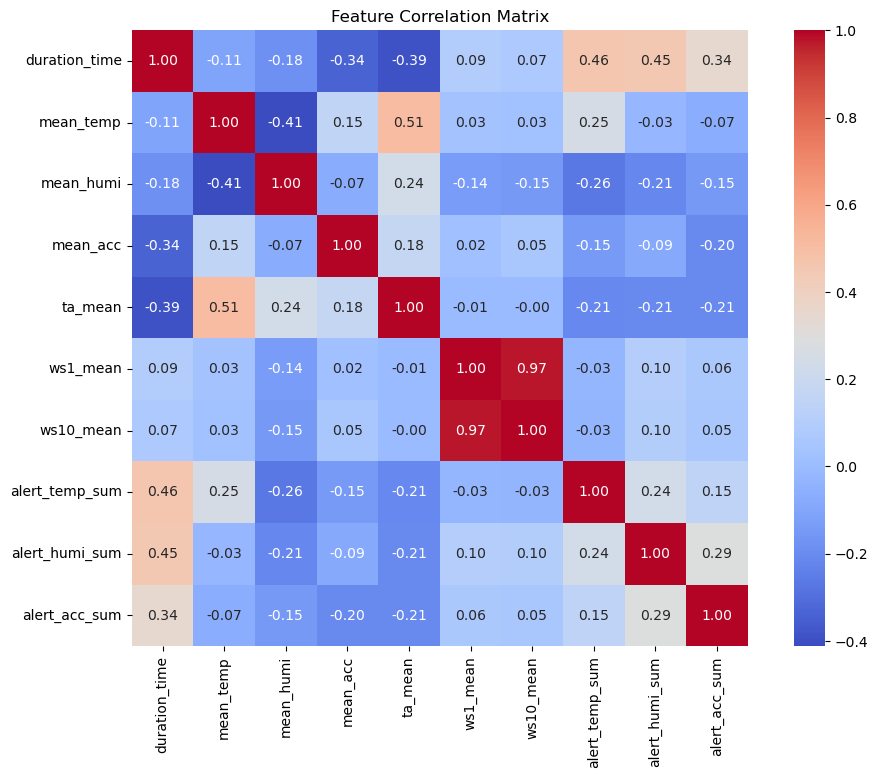

In [46]:
# 상관관계 분석
plt.figure(figsize=(12, 8))


features_to_convert = ['duration_time', 'mean_temp', 'mean_humi', 'mean_acc', 'ta_mean', 'ws1_mean', 'ws10_mean', 'alert_temp_sum', 'alert_humi_sum', 'alert_acc_sum']


correlation_matrix = df_fin[features_to_convert].corr()
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Feature Correlation Matrix')
plt.show()


### 데이터 임의 생성하기

In [ ]:
# Extract necessary columns
existing_device_serials = set(df_broken["device_serial"].tolist())

# Generate unique device_serials
def generate_device_serial(existing_serials, count):
    serials = set()
    while len(serials) < count:
        new_serial = f"VC6M{random.randint(1000, 9999)}"
        if new_serial not in existing_serials and new_serial not in serials:
            serials.add(new_serial)
    return list(serials)

# Generate random dates
def random_date(start, end):
    return start + timedelta(seconds=random.randint(0, int((end - start).total_seconds())))

# Generate 1000 new records
num_samples = 1000
start_date_range = datetime(2024, 1, 1)
end_date_range = datetime(2025, 1, 1)

new_device_serials = generate_device_serial(existing_device_serials, num_samples)

data = []
for serial in new_device_serials:
    start_date = random_date(start_date_range, end_date_range)
    duration = round(random.uniform(0.5, 45), 2)  # Duration in days
    end_date = start_date + timedelta(days=duration)
    
    # Temperature & humidity data
    min_temp = round(random.uniform(-20, 5), 1)
    max_temp = round(random.uniform(5, 30), 1)
    mean_temp = round(random.uniform(min_temp, max_temp), 1)
    std_temp = round(random.uniform(0, 5), 1)
    
    min_humi = round(random.uniform(10, 40), 1)
    max_humi = round(random.uniform(40, 100), 1)
    mean_humi = round(random.uniform(min_humi, max_humi), 1)
    std_humi = round(random.uniform(0, 10), 1)
    
    # Alert counts
    alert_temp_sum = random.randint(0, 100)
    alert_humi_sum = random.randint(0, 100)
    alert_acc_sum = random.randint(0, 500)
    
    # Broken indicator (0 or 1)
    broken_yn = random.choice([0, 1])
    
    # Example data indicator (0 for generated data)
    example_data = 0
    
    data.append([serial, start_date, end_date, duration * 24, duration, min_temp, max_temp, mean_temp, std_temp,
                 min_humi, max_humi, mean_humi, std_humi, alert_temp_sum, alert_humi_sum, alert_acc_sum, broken_yn, example_data])

# Create DataFrame
columns = ["device_serial", "start_date", "end_date", "duration_time", "duration_day", 
           "min_temp", "max_temp", "mean_temp", "std_temp", "min_humi", "max_humi", "mean_humi", "std_humi", 
           "alert_temp_sum", "alert_humi_sum", "alert_acc_sum", "broken_yn", "example_data"]

df_generated = pd.DataFrame(data, columns=columns)

# Convert date columns to string format for better readability
df_generated["start_date"] = df_generated["start_date"].dt.strftime("%Y-%m-%d %H:%M:%S")
df_generated["end_date"] = df_generated["end_date"].dt.strftime("%Y-%m-%d %H:%M:%S")

In [ ]:
# Display the generated dataset
import ace_tools as tools
tools.display_dataframe_to_user(name="Generated Cold Chain Data", dataframe=df_generated)